In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score,f1_score

In [69]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [70]:
df.shape

(768, 9)

In [71]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   3

In [72]:
zero_not_accepted=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mean)

In [73]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [104]:
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [105]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [106]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [107]:
y_pred = knn.predict(X_test)

In [108]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[94, 13],
       [15, 32]], dtype=int64)

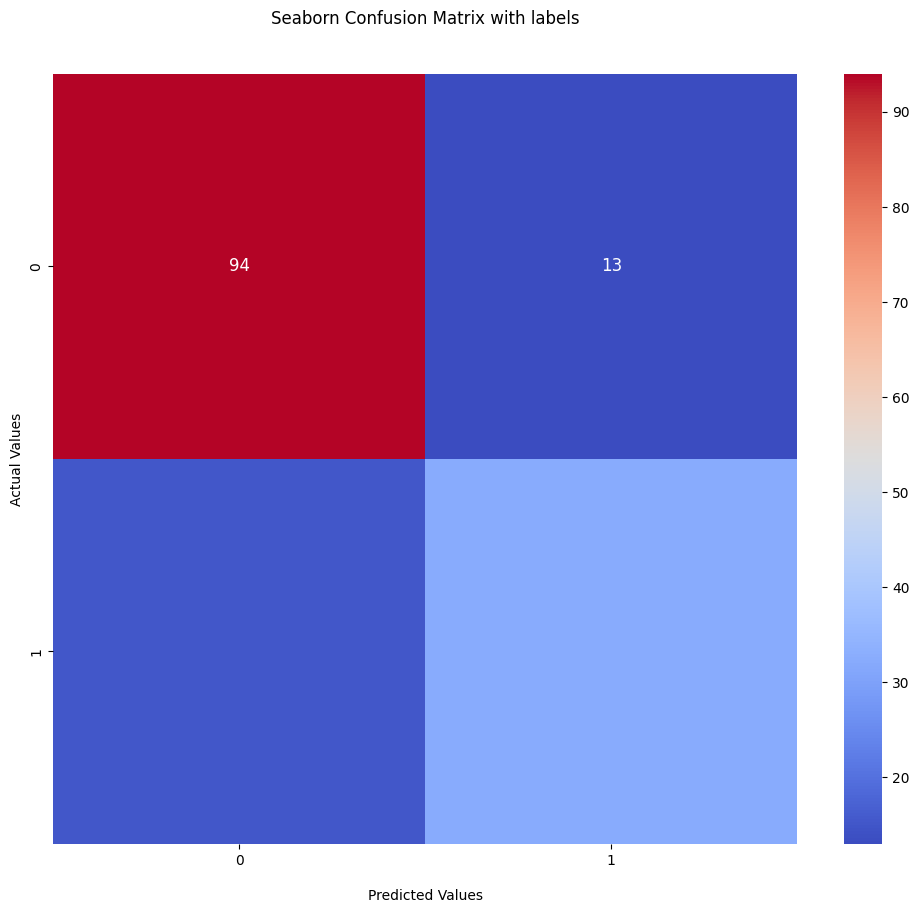

In [109]:
plt.figure(figsize=(12, 10))  # Increase figure size to give more space for text
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='coolwarm', annot_kws={"size": 12})
plt.title('Seaborn Confusion Matrix with labels\n\n')
plt.xlabel('\nPredicted Values')
plt.ylabel('Actual Values')

plt.show()


In [110]:
accuracy_score(y_test,y_pred)

0.8181818181818182

In [111]:
precision_score(y_test,y_pred)

0.7111111111111111

In [112]:
recall_score(y_test,y_pred)

0.6808510638297872

In [113]:
error_rate = 1 - accuracy_score(y_test,y_pred)

In [114]:
error_rate

0.18181818181818177